In [30]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('laptop_data.csv')

In [32]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [33]:
# how many rows and column 
df.shape

(1303, 12)

## Lots of information is hide in data 
- screenresolution  displaye is ips or not 
- cpu speed of processor like 2.3 GHZ and core i5,i7 and other 
- Ram either 8 gb and 16 gb 
- Memory like 128 Gb and 256 Gb 
- Gpu graphics 640 and 6000 and 620 
- opsys macos and no-os
- weight 1.37kg need to remove kg 


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [35]:
# check duplicate row 
# 0 means no other row identically similar 
df.duplicated().sum()

0

In [36]:
# check null value 
# no missing value in data 
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [37]:
# remove unname feature 
df.drop(columns=['Unnamed: 0'],inplace= True)

In [38]:
# remove GB from ram feature
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [40]:
# Ram and weight feature are object need to convert it into int and float
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


C:\Users\hkb-dev-83-local\AppData\Local\Temp\ipykernel_11860\344234588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

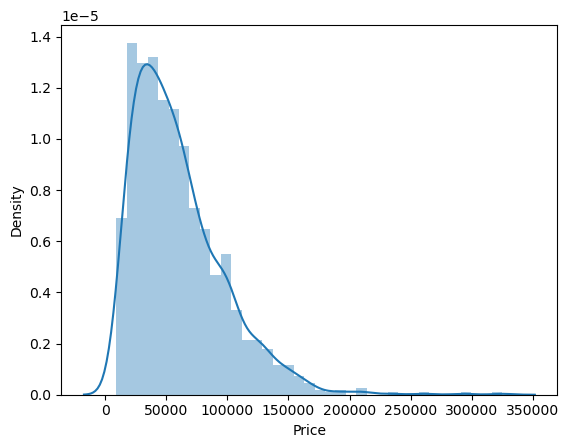

In [42]:
sns.distplot(df['Price'])


### its show the distribution of data 
- have less laptop that price is more than 1.5lpa 
- data skew towards right side 
- in real scenario most of the people use in between 50 k to 1 lpa 

<Axes: xlabel='Company'>

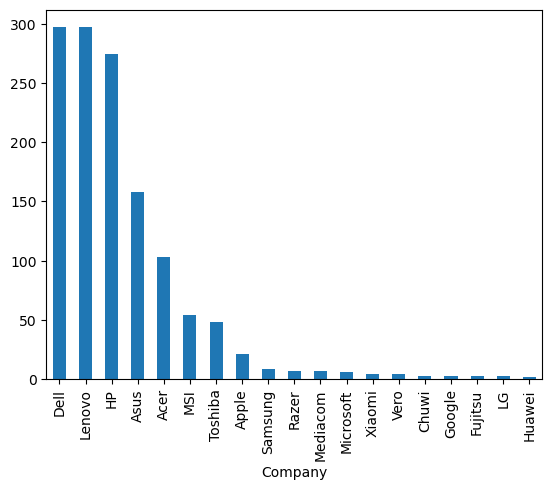

In [43]:
df['Company'].value_counts().plot(kind='bar')

## check brand name of laptop and othe user use
- Dell , lenove, HP, asus mostly use  and its price is also low as compare to other laptop brand 

## Bivariate analysis 
- compare the company with its price so it will help us comapny feature is imp or not 
- every brand have own price like we said low , medium and high 

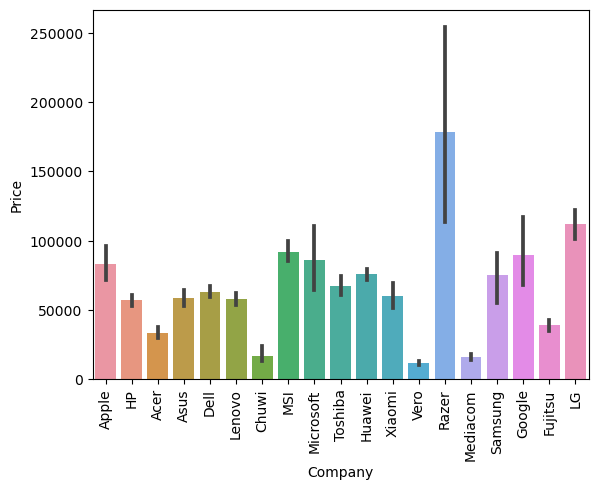

In [44]:
sns.barplot(x=df['Company'],y= df['Price'])
plt.xticks(rotation= 'vertical')
plt.show()


## 
- one of the brand that laptop cost is high as compare to other and brand is Razer ,LG, Microsoft , Apple 

## Univariate analysis

<Axes: xlabel='TypeName'>

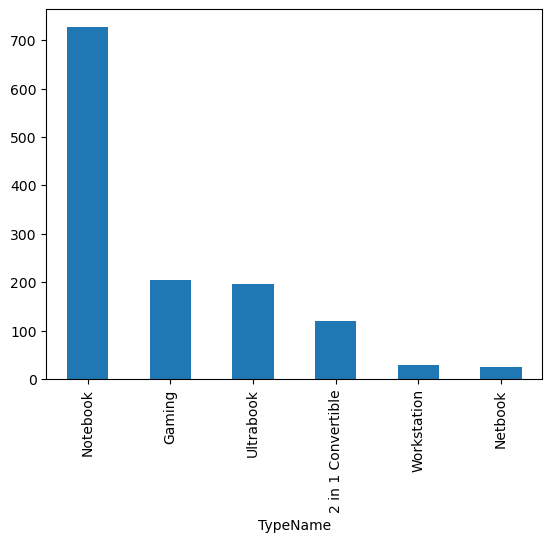

In [45]:
# how many type of laptop 
df['TypeName'].value_counts().plot(kind='bar')

## 
- observed that Notebook laptop is most demandable say that affordable to buy and most of seeling laptop and then gaming and ultrabook 
- mostly of the student and user want to buy budget laptop and notebook is best 

## Bivariate analysis
- Find the avg value of every category of laptop 

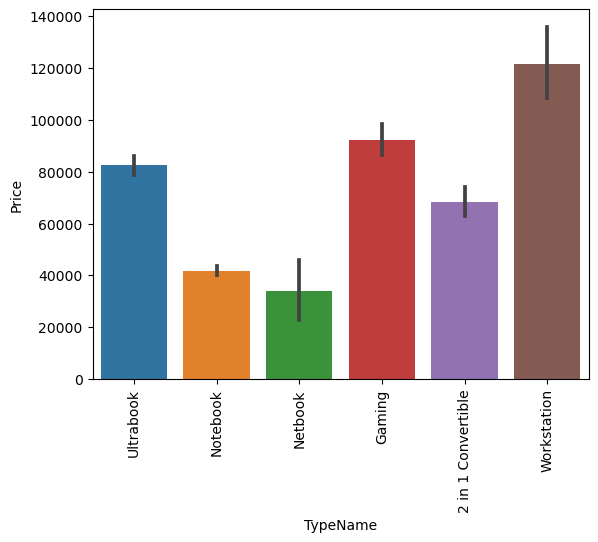

In [46]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## 
- Find thet workstation is most expensive then gaming and ultrabook and then 2 in 1 convertible

C:\Users\hkb-dev-83-local\AppData\Local\Temp\ipykernel_11860\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

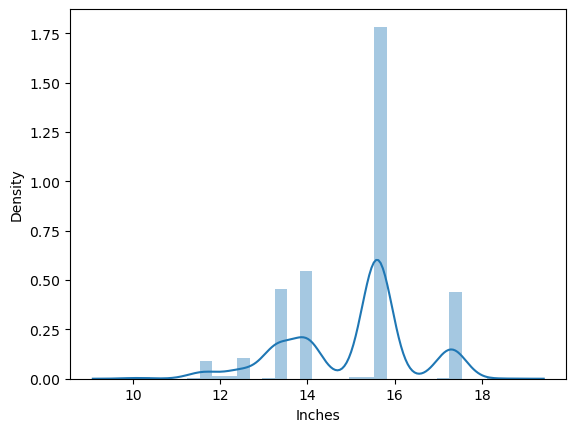

In [47]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

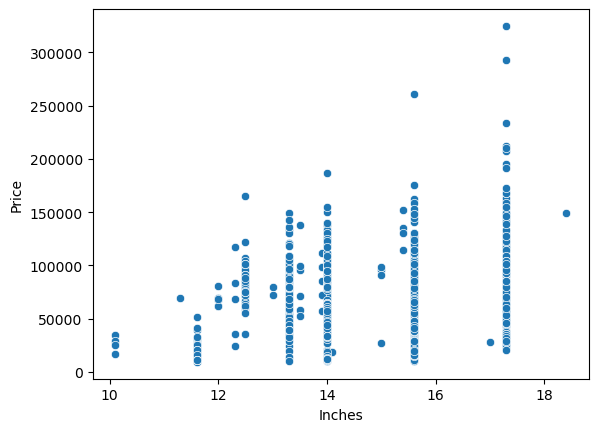

In [48]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

## 
- observed that if laptop size is increased similarly price is also increase
- dont think that price is strongly connected to the size bcs in scatter plot see that from 12.5 to 16 inches size are fall in same range 
- if laptop size is veru big like 17.5 to 18 so price will high 

In [49]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

## 
- ScreenResolution is very tough feature 
- but one thing is same that resolution value 
- one more imp note is that laptop either be touchscreen or not and ips pannel or not 

## Apply Some Feature enginnering 

In [50]:
df['TouchScreen']=df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [51]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [52]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
703,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD + 1TB HDD,Intel HD Graphics 620,Windows 10,2.10,33110.8560,0
438,Lenovo,Ultrabook,14.0,2560x1440,Intel Core i7 7500U 2.7GHz,24,512GB SSD,Intel HD Graphics 620,Windows 10,1.32,126912.9600,0
1041,Vero,Notebook,14.0,1366x768,Intel Atom X5-Z8350 1.44GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.45,11231.4240,0
350,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,108020.9376,1
31,Asus,Notebook,14.0,1366x768,AMD E-Series E2-6110 1.5GHz,2,32GB Flash Storage,AMD Radeon R2,Windows 10,1.65,10602.7200,0


<Axes: xlabel='TouchScreen'>

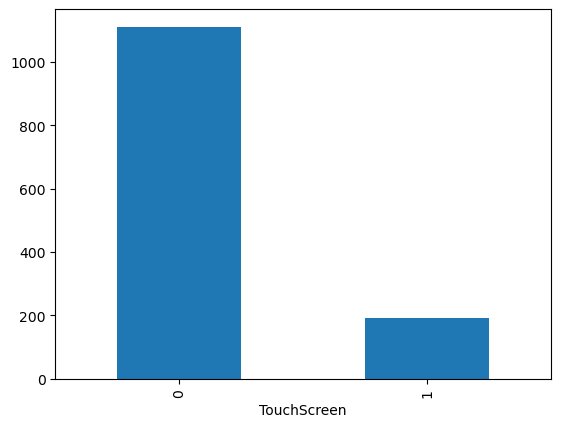

In [53]:
df['TouchScreen'].value_counts().plot(kind='bar')

## 
- 0 indicate not touchscreen laptop 
- 1 indicate touchscreen laptop (near about 200 ) 

<Axes: xlabel='TouchScreen', ylabel='Price'>

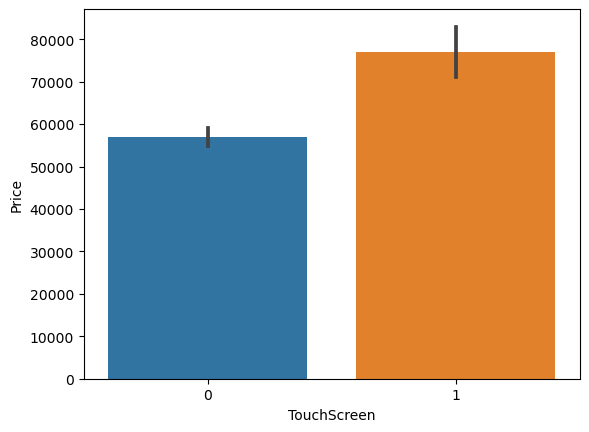

In [54]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

##
- see that price of touchscreen laptop is high as compare to non tocuscreen laptop 

In [55]:
df['Ips']= df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [56]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='Ips'>

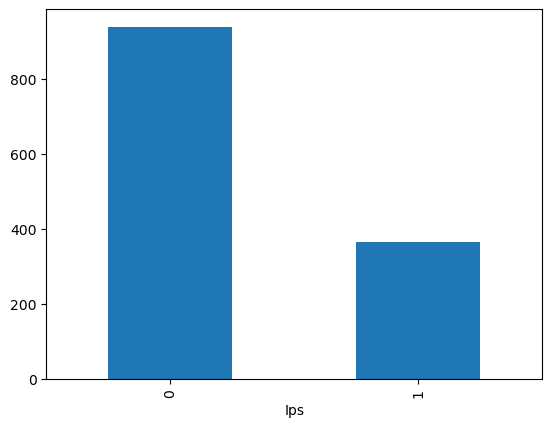

In [57]:
## check how laptop is Ips 
df['Ips'].value_counts().plot(kind='bar')

## 
- 0 indicate no IPs 
- 1 indicate with ips 

<Axes: xlabel='Ips', ylabel='Price'>

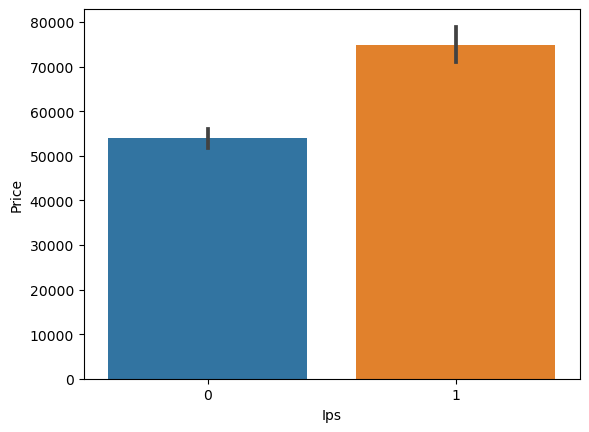

In [58]:
sns.barplot(x=df['Ips'],y= df['Price'])

## 
- find that laptop with IPs will have high price as compare to Non Ips

## 
- Seprate screenresolution like x-res and y-res 

In [60]:
new= df['ScreenResolution'].str.split('x',n=1,expand=True)

In [61]:
df['X_res']= new[0]
df['Y_res']= new[1]

In [62]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,X_res,Y_res
315,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.33,44968.32,0,0,Full HD 1920,1080
442,Lenovo,Ultrabook,12.5,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,76137.12,0,1,IPS Panel Full HD 1920,1080
1057,Acer,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,8,1TB HDD,AMD Radeon R5,Windows 10,2.40,23922.72,0,0,1366,768
571,HP,Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8,2TB HDD,Intel HD Graphics 405,Windows 10,1.94,20725.92,0,0,1366,768
464,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8,256GB SSD,Nvidia Quadro M2200M,Windows 10,2.67,111355.20,0,0,Full HD 1920,1080


In [63]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [64]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [66]:
correlations = df[['Inches', 'Ram','Weight', 'TouchScreen', 'Ips', 'X_res', 'Y_res', 'Price']].corr()['Price']
print(correlations)


Inches         0.068197
Ram            0.743007
Weight         0.210370
TouchScreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Price          1.000000
Name: Price, dtype: float64


## will make new feature i.e PPI 
- Formule of PPI is [(x_res)**2 + (y_res)**2]/Inches 

In [67]:
df['ppi']=((df['X_res']**2) + (df['Y_res']**2)** 0.5/ df['Inches']).astype('float')

In [68]:
correlations = df[['Inches', 'Ram','Weight', 'TouchScreen', 'Ips', 'X_res', 'Y_res', 'ppi','Price']].corr()['Price']
print(correlations)


Inches         0.068197
Ram            0.743007
Weight         0.210370
TouchScreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.515115
Price          1.000000
Name: Price, dtype: float64


In [69]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [70]:
df.drop(columns=['X_res','Y_res'],inplace=True)

In [71]:
df.drop(columns=['Inches'],inplace=True)

In [72]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,6.553720e+06
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,2.073668e+06
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,3.686469e+06
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,8.294517e+06
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,6.553720e+06


In [73]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [74]:
df['Cpu Name']=df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [75]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,6.553720e+06,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,2.073668e+06,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,3.686469e+06,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,8.294517e+06,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,6.553720e+06,Intel Core i5


In [76]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text== 'Intel Core i5' or text == 'Intel Core i3':
        return text 
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor' 

In [77]:
df['Cpu brand']= df['Cpu Name'].apply(fetch_processor)

In [78]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,6.553720e+06,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,2.073668e+06,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,3.686469e+06,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,8.294517e+06,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,6.553720e+06,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

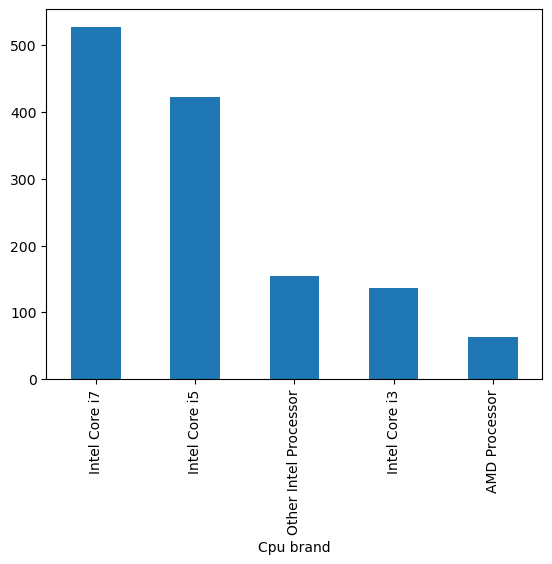

In [79]:
df['Cpu brand'].value_counts().plot(kind='bar')

##
- add all diffrent i7 feneration in only intel core i7 similary like all 
- find that i7 is more then i5 and other as per sequence order 

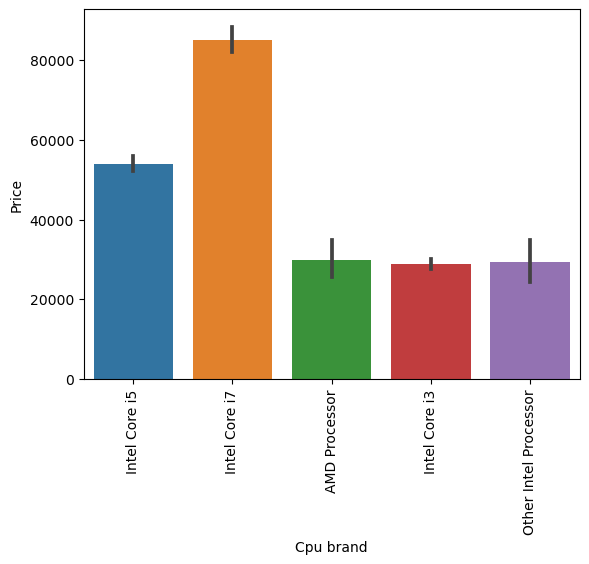

In [80]:
# compare with price 

sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## 
- i7 processor price on avg start from 80k 
- i5 processor price on avg start from 50k
- AMD processor price on avg start from 30k 

In [81]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [82]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,6.553720e+06,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,2.073668e+06,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,3.686469e+06,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,8.294517e+06,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,6.553720e+06,Intel Core i5


<Axes: xlabel='Ram'>

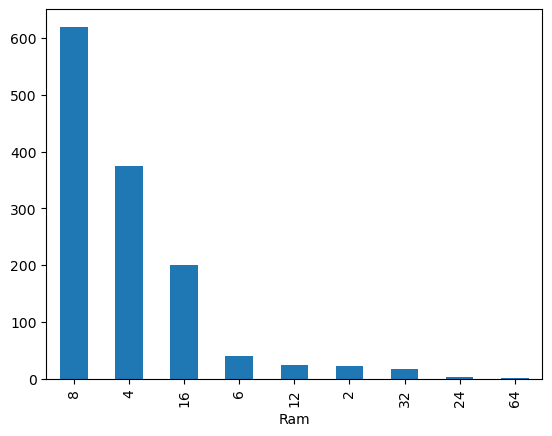

In [83]:
df['Ram'].value_counts().plot(kind='bar')

##
-  GB Ram is more purchasable in market and then 4,16,6,12 

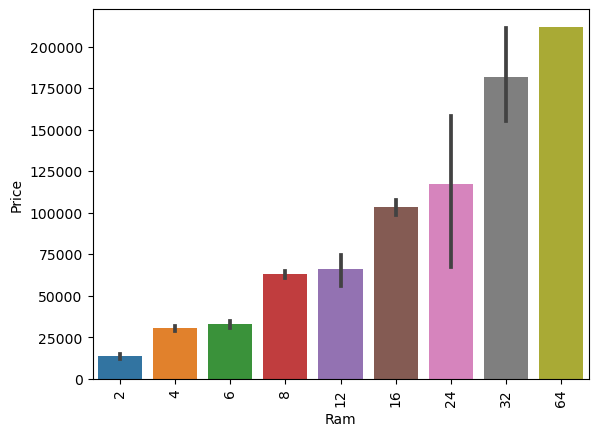

In [85]:
sns.barplot(x=df['Ram'],y= df['Price'])
plt.xticks(rotation= 'vertical')
plt.show()

## 
- found that if Ram is increased so that price is also increased 

In [87]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [88]:
import pandas as pd

# Assuming df is your DataFrame

# Convert 'Memory' column to string type
df['Memory'] = df['Memory'].astype(str)

# Extract numeric values using regular expressions
df['Memory_numeric'] = df['Memory'].str.extract(r'(\d+)', expand=False).astype(float)

# Replace 'TB' with '000' for better representation of storage size
df['Memory'] = df['Memory'].str.replace('TB', '000')

# Extracting the type of storage
df['Storage_type'] = df['Memory'].str.extract(r'(\D+)', expand=False).str.strip()

# Handling different storage types
df['HDD'] = df.apply(lambda row: row['Memory_numeric'] if row['Storage_type'] == 'HDD' else 0, axis=1)
df['SDD'] = df.apply(lambda row: row['Memory_numeric'] if row['Storage_type'] == 'SSD' else 0, axis=1)
df['Hybrid'] = df.apply(lambda row: row['Memory_numeric'] if row['Storage_type'] == 'Hybrid' else 0, axis=1)
df['Flash_storage'] = df.apply(lambda row: row['Memory_numeric'] if row['Storage_type'] == 'Flash Storage' else 0, axis=1)

# Drop unnecessary columns
df.drop(columns=['Memory_numeric', 'Storage_type'], inplace=True)

# Now you have 'HDD', 'SDD', 'Hybrid', 'Flash_storage' columns representing the different storage types


In [89]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SDD,Hybrid,Flash_storage
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,6.553720e+06,Intel Core i5,0.0,0.0,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,2.073668e+06,Intel Core i5,0.0,0.0,0,0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,3.686469e+06,Intel Core i5,0.0,0.0,0,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,8.294517e+06,Intel Core i7,0.0,0.0,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,6.553720e+06,Intel Core i5,0.0,0.0,0,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1303 non-null   object 
 1   TypeName       1303 non-null   object 
 2   Ram            1303 non-null   int32  
 3   Memory         1303 non-null   object 
 4   Gpu            1303 non-null   object 
 5   OpSys          1303 non-null   object 
 6   Weight         1303 non-null   float32
 7   Price          1303 non-null   float64
 8   TouchScreen    1303 non-null   int64  
 9   Ips            1303 non-null   int64  
 10  ppi            1303 non-null   float64
 11  Cpu brand      1303 non-null   object 
 12  HDD            1303 non-null   float64
 13  SDD            1303 non-null   float64
 14  Hybrid         1303 non-null   int64  
 15  Flash_storage  1303 non-null   int64  
dtypes: float32(1), float64(4), int32(1), int64(4), object(6)
memory usage: 152.8+ KB


In [91]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SDD,Hybrid,Flash_storage
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,6.553720e+06,Intel Core i5,0.0,0.0,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,2.073668e+06,Intel Core i5,0.0,0.0,0,0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,3.686469e+06,Intel Core i5,0.0,0.0,0,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,8.294517e+06,Intel Core i7,0.0,0.0,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,6.553720e+06,Intel Core i5,0.0,0.0,0,0


In [92]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SDD,Hybrid,Flash_storage
41,Dell,Gaming,16,256GB SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.65,79866.7200,0,1,3.686469e+06,Intel Core i7,0.0,0.0,0,0
137,Asus,Gaming,8,128GB SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,3.00,49976.6400,0,0,3.686462e+06,Intel Core i5,0.0,0.0,0,0
1297,Asus,Notebook,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0,0,1.866005e+06,Intel Core i7,0.0,0.0,0,0
260,Dell,Notebook,8,128GB SSD + 1000 HDD,AMD Radeon 530,Windows 10,2.80,60845.7600,0,0,3.686462e+06,Intel Core i7,0.0,0.0,0,0
82,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.63,45820.8000,0,0,3.686477e+06,Intel Core i5,0.0,0.0,0,0


## 
- instead of memory create three new feature i.e HDD, SDD, Flash_Storage
- need to remove memory column 

In [93]:
df.drop(columns=['Memory'],inplace= True)

In [94]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SDD,Hybrid,Flash_storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,6.553720e+06,Intel Core i5,0.0,0.0,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,2.073668e+06,Intel Core i5,0.0,0.0,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,3.686469e+06,Intel Core i5,0.0,0.0,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,8.294517e+06,Intel Core i7,0.0,0.0,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,6.553720e+06,Intel Core i5,0.0,0.0,0,0


In [95]:
correlations = df[['Ram','Weight', 'Price','TouchScreen', 'Ips', 'ppi', 'HDD', 'SDD','Hybrid','Flash_storage']].corr()['Price']
print(correlations)


Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
Ips              0.252208
ppi              0.515115
HDD             -0.297253
SDD              0.290590
Hybrid                NaN
Flash_storage         NaN
Name: Price, dtype: float64


In [96]:
df.drop(columns=['Hybrid','Flash_storage'],inplace=True)

In [97]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,6.553720e+06,Intel Core i5,0.0,0.0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,2.073668e+06,Intel Core i5,0.0,0.0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,3.686469e+06,Intel Core i5,0.0,0.0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,8.294517e+06,Intel Core i7,0.0,0.0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,6.553720e+06,Intel Core i5,0.0,0.0


In [98]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [99]:
df['Gpu brand']=df['Gpu'].apply(lambda x: x.split()[0])

In [100]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SDD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,6.553720e+06,Intel Core i5,0.0,0.0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,2.073668e+06,Intel Core i5,0.0,0.0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,3.686469e+06,Intel Core i5,0.0,0.0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,8.294517e+06,Intel Core i7,0.0,0.0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,6.553720e+06,Intel Core i5,0.0,0.0,Intel


In [101]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [102]:
df=df[df['Gpu brand'] != 'ARM']

In [103]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

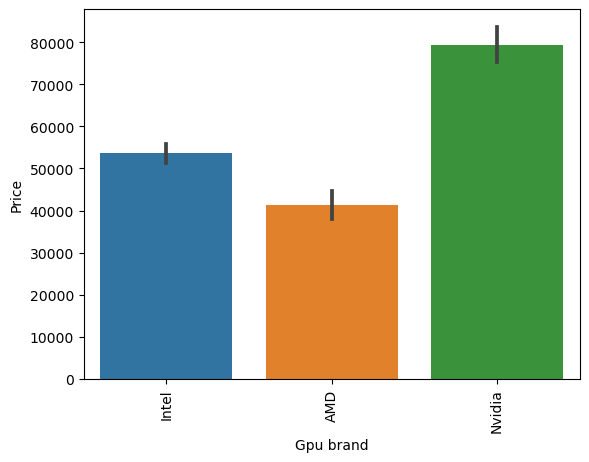

In [104]:
sns.barplot(x=df['Gpu brand'],y= df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## 
- Nvidia Gpu laptop price is so high 
- small mistake found that may be its wrong see that AMD gpu laptop price is low as compare to intel. 


In [105]:
df.drop(columns=['Gpu'],inplace=True)

In [106]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SDD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,6.553720e+06,Intel Core i5,0.0,0.0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,2.073668e+06,Intel Core i5,0.0,0.0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,3.686469e+06,Intel Core i5,0.0,0.0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,8.294517e+06,Intel Core i7,0.0,0.0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,6.553720e+06,Intel Core i5,0.0,0.0,Intel


In [107]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

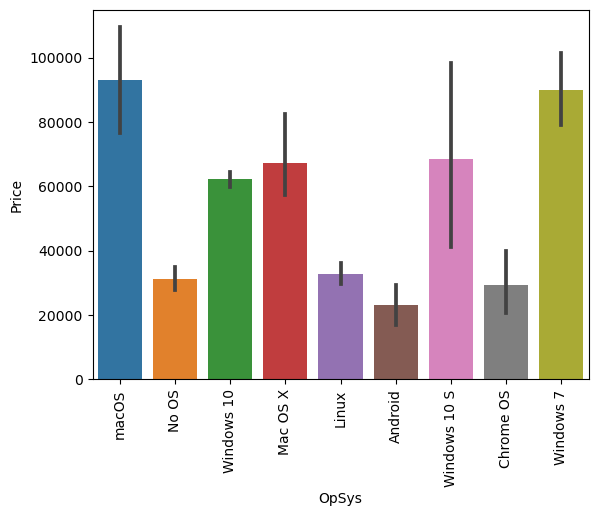

In [108]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [114]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':  
        return 'Mac'
    else:
        return 'Others/No OS/Linux'


In [115]:
df['Os']= df['OpSys'].apply(cat_os)

In [116]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SDD,Gpu brand,os,Os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,6.553720e+06,Intel Core i5,0.0,0.0,Intel,Others/No OS/Linux,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,2.073668e+06,Intel Core i5,0.0,0.0,Intel,Others/No OS/Linux,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,3.686469e+06,Intel Core i5,0.0,0.0,Intel,Others/No OS/Linux,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,8.294517e+06,Intel Core i7,0.0,0.0,AMD,Others/No OS/Linux,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,6.553720e+06,Intel Core i5,0.0,0.0,Intel,Others/No OS/Linux,Mac


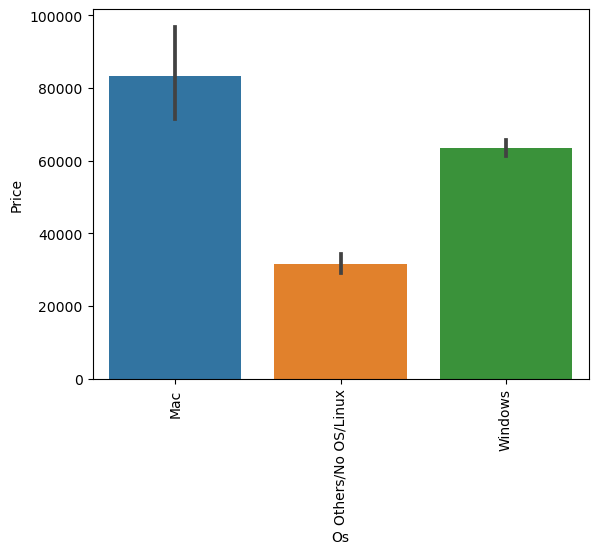

In [117]:
sns.barplot(x=df['Os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## 
- found that Mac is so expensive then windows and then other

In [118]:
df.drop(columns=['OpSys','os'],inplace=True)

In [119]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,ppi,Cpu brand,HDD,SDD,Gpu brand,Os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,6.553720e+06,Intel Core i5,0.0,0.0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,2.073668e+06,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,3.686469e+06,Intel Core i5,0.0,0.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,8.294517e+06,Intel Core i7,0.0,0.0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,6.553720e+06,Intel Core i5,0.0,0.0,Intel,Mac


C:\Users\hkb-dev-83-local\AppData\Local\Temp\ipykernel_11860\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

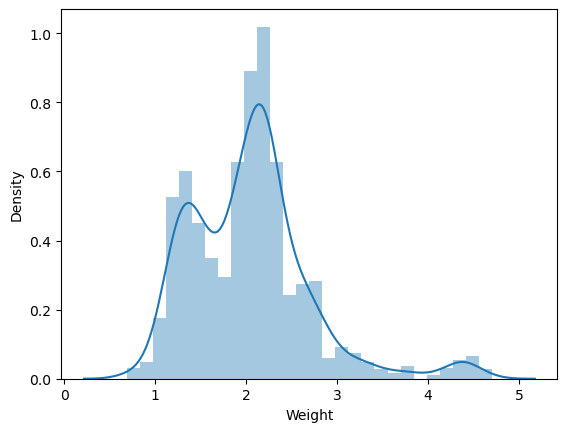

In [120]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

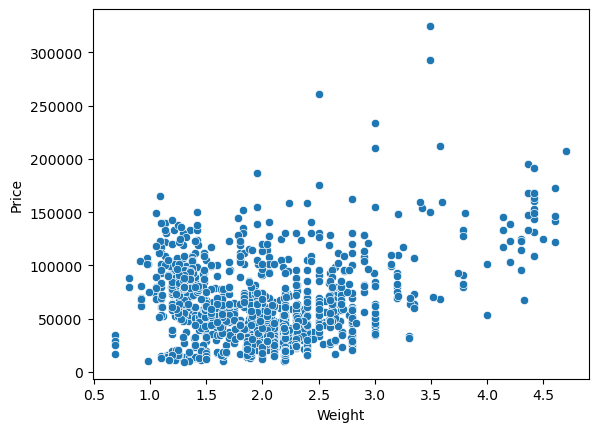

In [121]:
sns.scatterplot(x=df['Weight'],y= df['Price'])

In [124]:
features = ['Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'ppi', 'HDD', 'SDD']

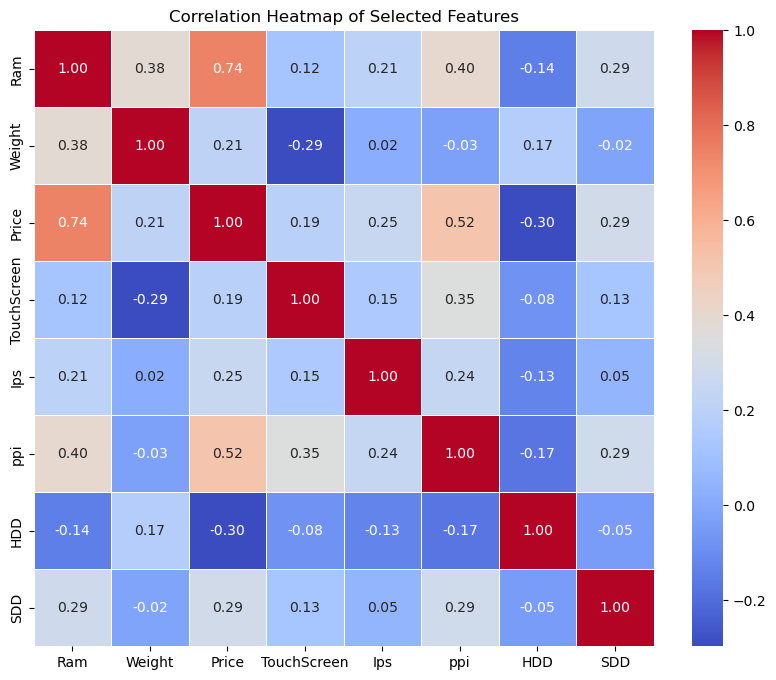

In [125]:
corr_matrix = df[features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

C:\Users\hkb-dev-83-local\AppData\Local\Temp\ipykernel_11860\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

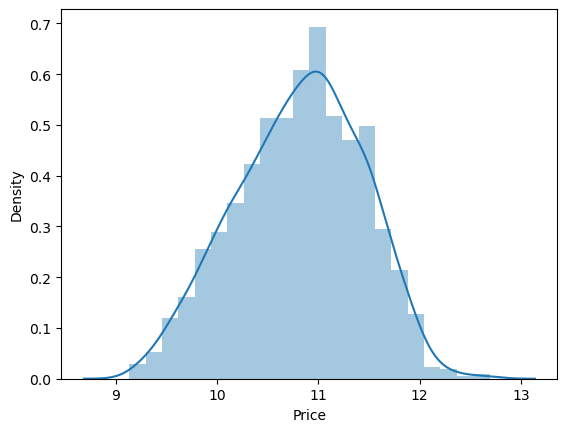

In [127]:
sns.distplot(np.log(df['Price']))

In [128]:
X= df.drop(columns=['Price'])
y= np.log(df['Price'])

In [129]:
X

,Company,TypeName,Ram,Weight,TouchScreen,Ips,ppi,Cpu brand,HDD,SDD,Gpu brand,Os
0,Apple,Ultrabook,8,1.37,0,1,6.553720e+06,Intel Core i5,0.0,0.0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,2.073668e+06,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,3.686469e+06,Intel Core i5,0.0,0.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,8.294517e+06,Intel Core i7,0.0,0.0,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,6.553720e+06,Intel Core i5,0.0,0.0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,3.686477e+06,Intel Core i7,0.0,0.0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,1.024014e+07,Intel Core i7,0.0,0.0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,1.866011e+06,Other Intel Processor,0.0,0.0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,1.866005e+06,Intel Core i7,1.0,0.0,AMD,Windows


In [130]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test,= train_test_split(X,y,test_size=0.15,random_state=2)

In [132]:
X_train 

,Company,TypeName,Ram,Weight,TouchScreen,Ips,ppi,Cpu brand,HDD,SDD,Gpu brand,Os
183,Toshiba,Notebook,8,2.00,0,0,1.866005e+06,Intel Core i5,0.0,0.0,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,3.686469e+06,Intel Core i7,0.0,0.0,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,1.866022e+06,Other Intel Processor,0.0,0.0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,3.686469e+06,Intel Core i3,1.0,0.0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,3.686469e+06,Intel Core i5,0.0,0.0,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,1.866005e+06,Intel Core i3,0.0,0.0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,3.686469e+06,Intel Core i7,0.0,0.0,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,1.866005e+06,AMD Processor,1.0,0.0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,1.866005e+06,Intel Core i3,2.0,0.0,Nvidia,Others/No OS/Linux


In [141]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error


In [136]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR 


In [145]:
from sklearn.metrics import r2_score, mean_absolute_error

In [146]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='error'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.7961160640921716
MAE: 0.22100324702624125


In [148]:
np.exp(0.22)

1.2460767305873808

## 
- Ridge Regression 

In [150]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='error'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.7986632438429506
MAE: 0.21827873795585212


## 
-  Lasso Regression 

In [151]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='error'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.7952402851370965
MAE: 0.21978341923923397


## 
- KNN 

In [152]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='error'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.8438269467891377
MAE: 0.18357015636304025


## 
- Decision Tree

In [153]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='error'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.8285519918835875
MAE: 0.1932513893518216


## 
- SVM

In [154]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='error'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.41994869466119344
MAE: 0.3798053145740117


## 
- Random Forest 

In [161]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf', OneHotEncoder(drop='first', handle_unknown='error'), [0, 1, 7, 10, 11])
# ], remainder='passthrough')



step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11])
], remainder='passthrough')






step2 =RandomForestRegressor(n_estimators=100,
                               random_state=3,
                               max_samples=0.5,
                               max_features=0.75,
                               max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.8893125902849544
MAE: 0.1559498510937697


## 
- Gradient Boost 

In [158]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='error'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 =GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred)) 

R2 Score: 0.8726310173019001
MAE: 0.16116554007441916


## 
- Exporting The Model  

In [162]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))